In [5]:
# 필요한 라이브러리들 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [6]:
# CSV 파일을 읽어 데이터프레임 (df)에 저장
# 데이터프레임의 첫 5개 행을 확인
df=pd.read_csv('/content/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [7]:
#데이터프레임의 컬럼명을 확인
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [8]:
# 데이터프래임의 통계적 요약 정보를 확인
df.describe

<bound method NDFrame.describe of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]>

In [9]:
# 데이터프레임에서 결측치(null) 값을 컬럽별로 합산하여 확인
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [10]:
# 데이터프레임의 구조와 데이터 타입 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [11]:
df['Device Model'].value_counts()
df['Device Model']=df['Device Model'].replace('Xiaomi Mi 11',0)
df['Device Model']=df['Device Model'].replace('iPhone 12',1)
df['Device Model']=df['Device Model'].replace('Google Pixel 5',2)
df['Device Model']=df['Device Model'].replace('OnePlus 9',3)
df['Device Model']=df['Device Model'].replace('Samsung Galaxy S21',4)

<ipython-input-11-95f2fa8bf403>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Device Model']=df['Device Model'].replace('Samsung Galaxy S21',4)


In [12]:
# 'Operating System' 컬럼의 값을 OS 이름에서 숫자로 변환하여 매핑
df['Operating System'].value_counts()
df['Operating System']=df['Operating System'].replace('Android',1)
df['Operating System']=df['Operating System'].replace('iOS',0)

<ipython-input-12-eaeee573d03b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Operating System']=df['Operating System'].replace('iOS',0)


In [13]:
df['Gender'].value_counts()
df['Gender']=df['Gender'].replace('Male',1)
df['Gender']=df['Gender'].replace('Female',0)

<ipython-input-13-e4a9850274b7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace('Female',0)


<Axes: xlabel='Data Usage (MB/day)', ylabel='Count'>

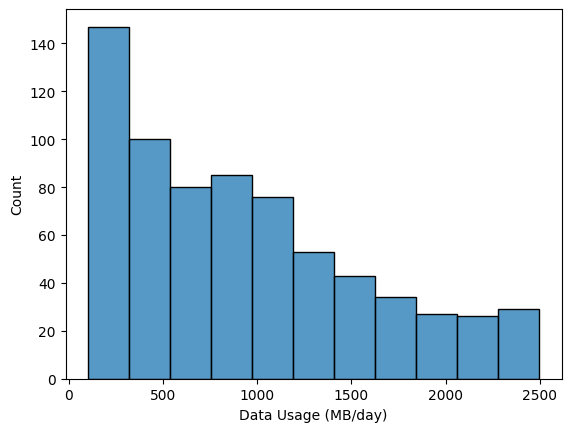

In [14]:
# 하루 데이터 사용량의 분포를 시각화
sns.histplot(df['Data Usage (MB/day)'])

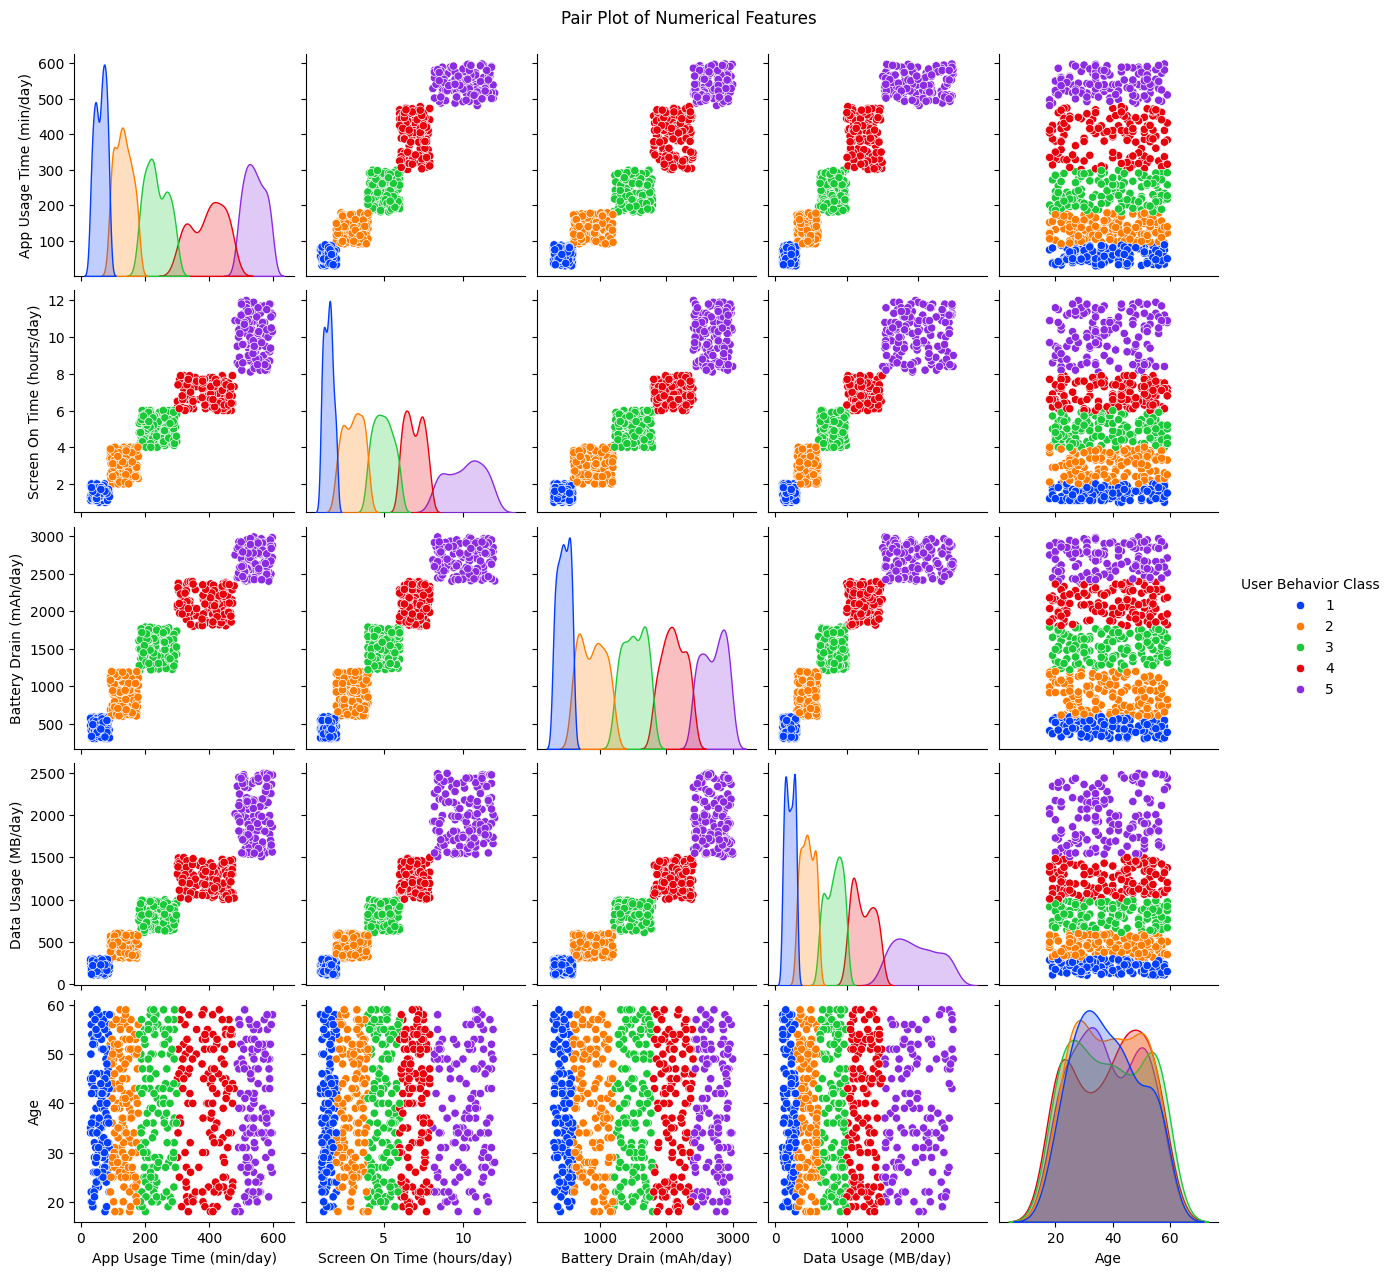

In [15]:
sns.pairplot(df, vars=['App Usage Time (min/day)',
'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
'Data Usage (MB/day)', 'Age'], hue='User Behavior Class',
                                      palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

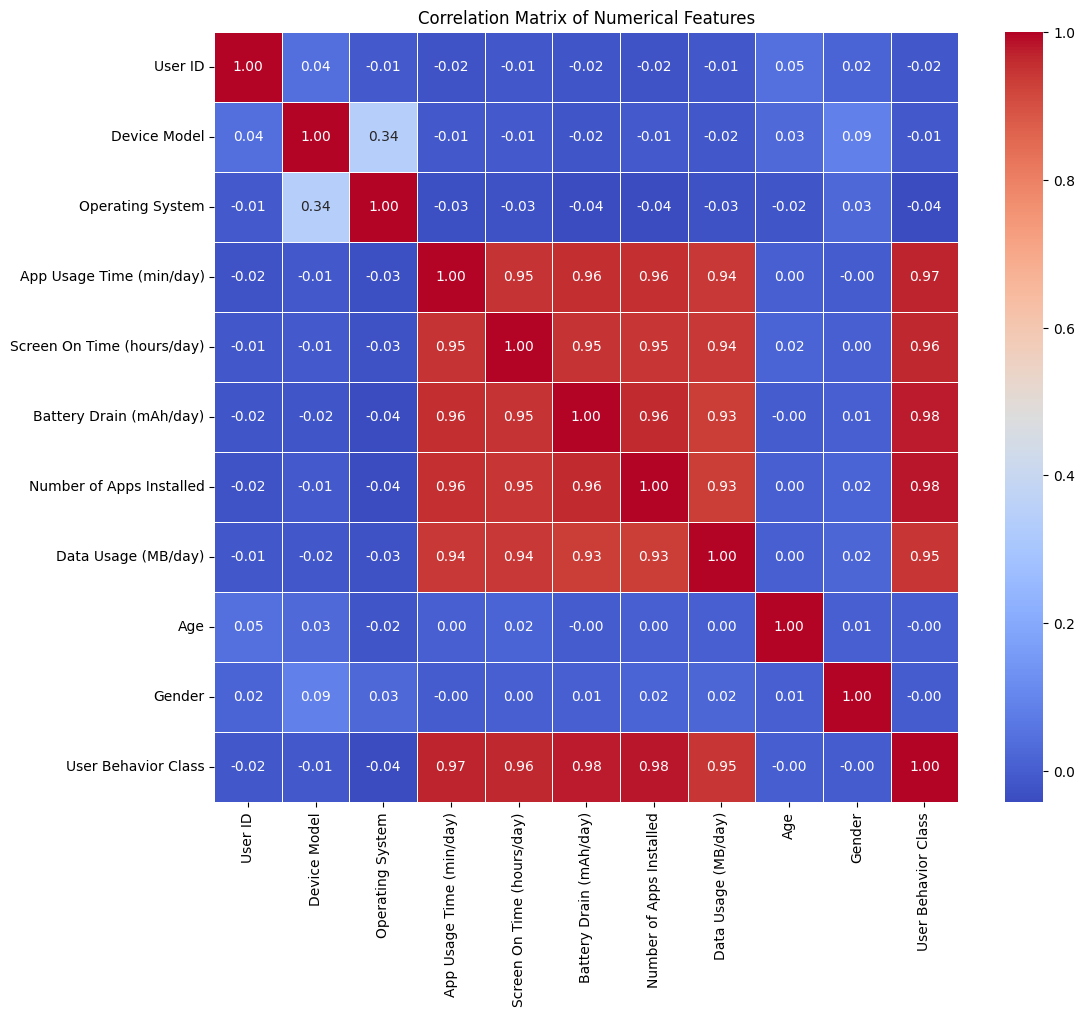

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

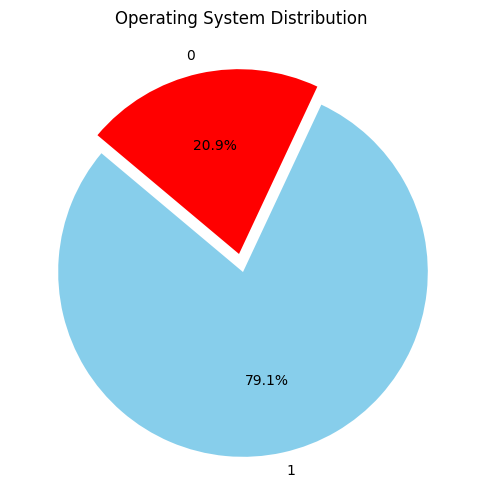

In [18]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie
(autopct='%1.1f%%', colors=['skyblue', 'red'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

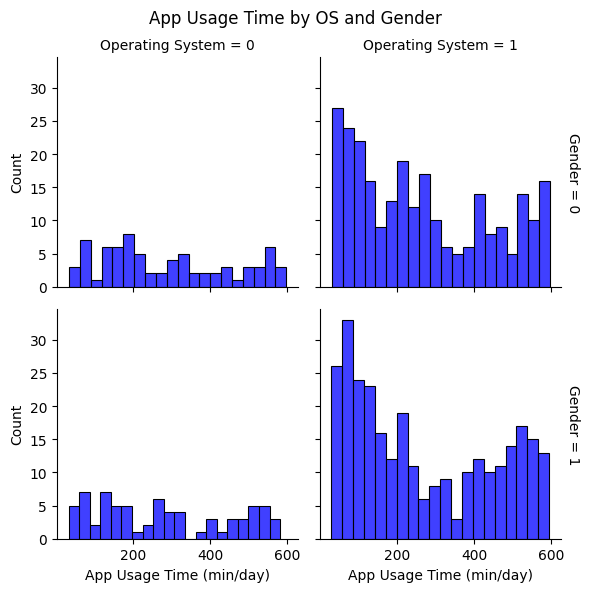

In [19]:
g = sns.FacetGrid(df, col='Operating System', row='Gender', margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App Usage Time (min/day)', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()

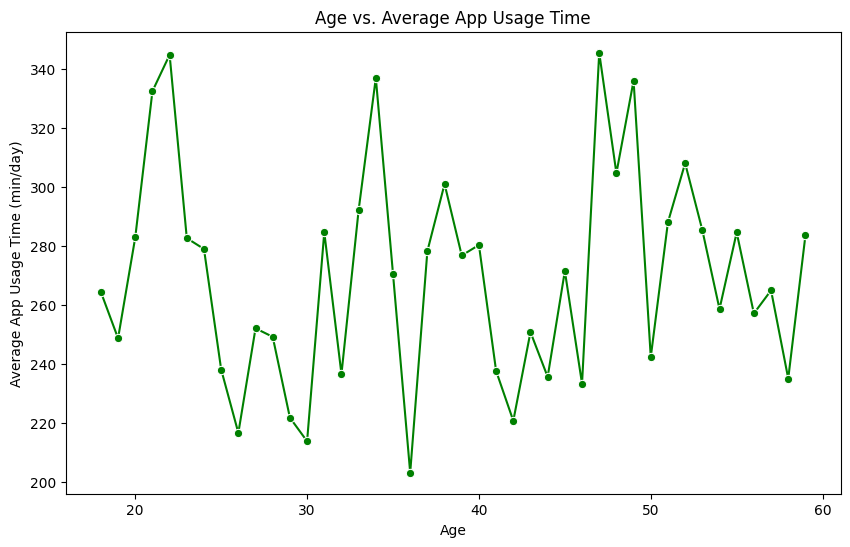

In [33]:
plt.figure(figsize=(10, 6))
age_usage = df.groupby('Age')['App Usage Time (min/day)'].mean().reset_index()
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=age_usage, marker='o', color='green')
plt.title('Age vs. Average App Usage Time')
plt.xlabel('Age')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()

In [20]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

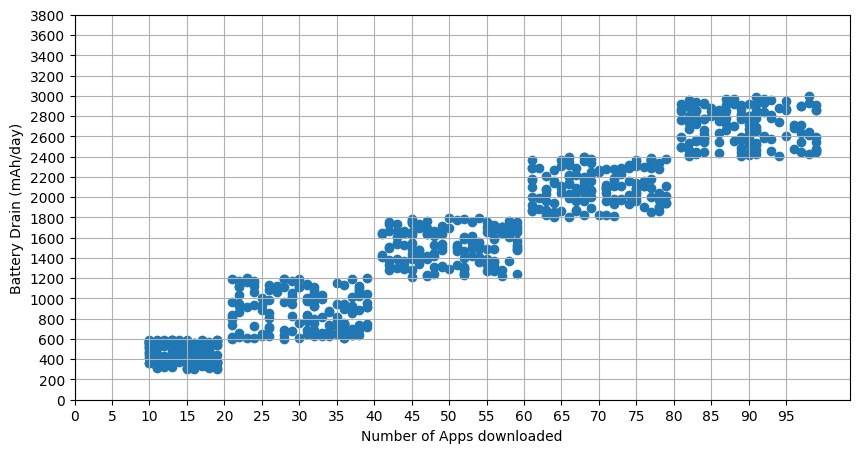

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Number of Apps Installed'],df['Battery Drain (mAh/day)'])
plt.ylabel('Battery Drain (mAh/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 4000, 200))
plt.grid()
plt.show()

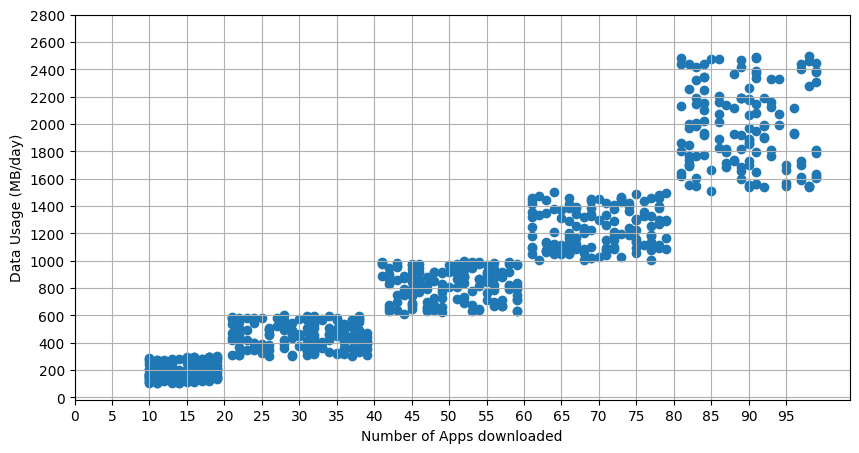

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Number of Apps Installed'],df['Data Usage (MB/day)'])
plt.ylabel('Data Usage (MB/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 3000, 200))
plt.grid()
plt.show()

In [23]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

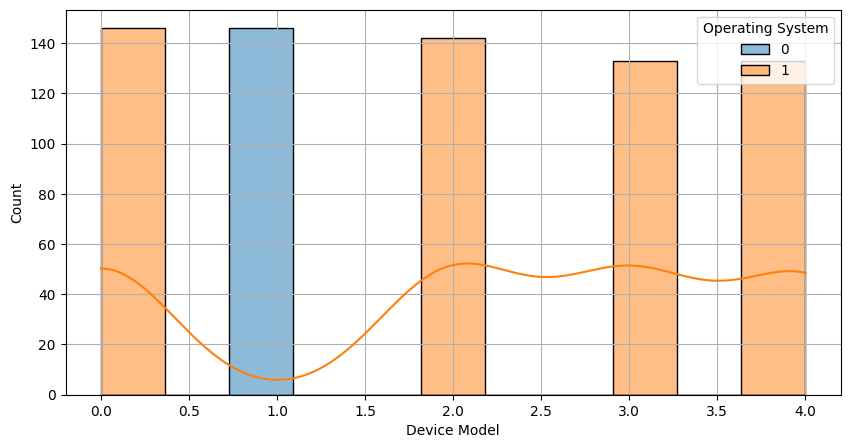

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Device Model', kde=True, hue='Operating System')
plt.grid()
plt.show()

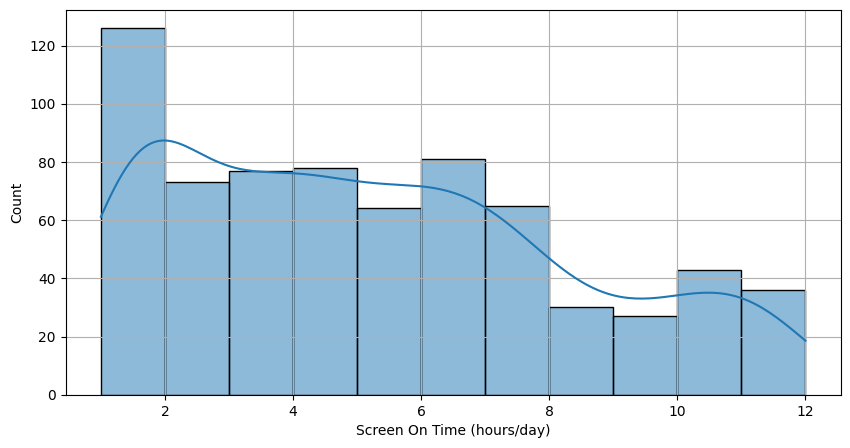

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Screen On Time (hours/day)', kde=True)
plt.grid()
plt.show()

In [26]:
X=df.drop(columns=['User Behavior Class'],axis=1)
y=df['User Behavior Class']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333
Confusion Matrix:
 [[41  5  0  0  0]
 [ 0 26  6  2  0]
 [ 0 10 29 10  1]
 [ 0  0 12 31  4]
 [ 0  0  0  6 27]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        46
           2       0.63      0.76      0.69        34
           3       0.62      0.58      0.60        50
           4       0.63      0.66      0.65        47
           5       0.84      0.82      0.83        33

    accuracy                           0.73       210
   macro avg       0.75      0.74      0.74       210
weighted avg       0.74      0.73      0.74       210



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [30]:
from sklearn.svm import SVC

# Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 46  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        50
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 46  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        50
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

